In [ ]:

import random
import cv2
 
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 2000)
    for i in range(number_of_pixels):
       
        x_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        y_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        directions=[[1,0],[-1,0],[0,1],[0,-1],[1,1],[1,-1],[-1,-1],[-1,1]]
        for i,j in directions:
          dr,dc=x_coord+i,y_coord+j
          if dr in range(row) and dc in range(col):
            img[dr][dc] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 2000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        x_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        y_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        directions=[[1,0],[-1,0],[0,1],[0,-1],[1,1],[1,-1],[-1,-1],[-1,1]]
        for i,j in directions:
          dr,dc=x_coord+i,y_coord+j
          if dr in range(row) and dc in range(col):
            img[dr][dc] = 0
    return img
 
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('/content/drive/MyDrive/Capstone Project/Research Papers/Images/testing/test.png',
                 cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('/content/drive/MyDrive/Capstone Project/Research Papers/Images/testing/noise.png',
            add_noise(img))

True

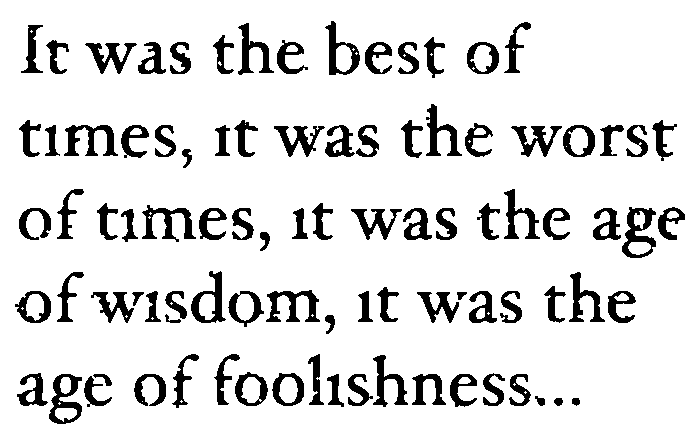

True

In [ ]:
#Connected Components
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 
 
# Loading the image
img = cv2.imread('/content/drive/MyDrive/Capstone Project/Research Papers/Images/testing/noise.png')
#cv2_imshow(img) 
# preprocess the image
gray_img = cv2.cvtColor(img ,
                        cv2.COLOR_BGR2GRAY)
 
# Applying 3x3 Gaussian Blur
blurred = cv2.GaussianBlur(gray_img, (3, 3), 0)
 
# Applying threshold
threshold = cv2.threshold(blurred, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
 
# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(threshold,
                                            4,
                                            cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
 
# Initialize a new image to
# store all the output components
output = np.zeros(gray_img.shape, dtype="uint8")
 
# Loop through each component
for i in range(1, totalLabels):
    
      # Area of the component
    area = values[i, cv2.CC_STAT_AREA]
        #print(area) 
    if (area > 50):
        # Create a new image for bounding boxes
        new_img=img.copy()
         
        # Now extract the coordinate points
        x1 = values[i, cv2.CC_STAT_LEFT]
        y1 = values[i, cv2.CC_STAT_TOP]
        w = values[i, cv2.CC_STAT_WIDTH]
        h = values[i, cv2.CC_STAT_HEIGHT]
         
        # Coordinate of the bounding box
        pt1 = (x1, y1)
        pt2 = (x1+ w, y1+ h)
        (X, Y) = centroid[i]
         
        # Bounding boxes for each component
        cv2.rectangle(new_img,pt1,pt2,
                      (0, 255, 0), 3)
        cv2.circle(new_img, (int(X),
                             int(Y)),
                   4, (0, 0, 255), -1)
 
        # Create a new array to show individual component
        component = np.zeros(gray_img.shape, dtype="uint8")
        componentMask = (label_ids == i).astype("uint8") * 255
 
        # Apply the mask using the bitwise operator
        component = cv2.bitwise_or(component,componentMask)
        output = cv2.bitwise_or(output, componentMask)
         
        # Show the final images
        #cv2_imshow(new_img)
        #cv2_imshow(component)
output=255-output
cv2_imshow(output)
cv2.imwrite('/content/drive/MyDrive/Capstone Project/Research Papers/Images/testing/cc.png',output)

In [ ]:
#original and noise
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    print(mse)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("/content/drive/MyDrive/Capstone Project/Research Papers/Images/testing/test.png")
     compressed = cv2.imread('/content/drive/MyDrive/Capstone Project/Research Papers/Images/testing/noise.png')
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

1.0453506493506493
PSNR value is 47.93818367517312 dB


In [ ]:
#original and cc
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    print(mse)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("/content/drive/MyDrive/Capstone Project/Research Papers/Images/testing/test.png")
     compressed = cv2.imread('/content/drive/MyDrive/Capstone Project/Research Papers/Images/testing/cc.png')
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

17.747324675324677
PSNR value is 35.639474663676836 dB
